c:\Users\10075\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3521 - loss: 1.7485 - val_accuracy: 0.5382 - val_loss: 1.2865
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5617 - loss: 1.2299 - val_accuracy: 0.6162 - val_loss: 1.1045
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6300 - loss: 1.0569 - val_accuracy: 0.6402 - val_loss: 1.0111
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6632 - loss: 0.9621 - val_accuracy: 0.6456 - val_loss: 1.0162
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6975 - loss: 0.8698 - val_accuracy: 0.6803 - val_loss: 0.9151
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7187 - loss: 0.8044 - val_accuracy: 0.6884 - val_loss: 0.8988
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7339 - loss: 0.7601 - val_accuracy: 0.6977 - val_loss: 0.8685
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7533 - l

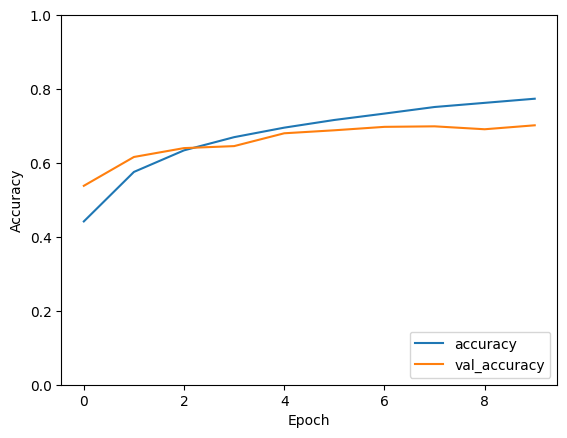

In [1]:
# -*- coding: utf-8 -*-

import tensorflow as tf # 深度学习库，提供构建和训练模型的工具。
from tensorflow.keras import datasets, layers, models # 用于加载预定义数据集，构建模型层和创建模型。
import matplotlib.pyplot as plt # 绘图，瞅瞅训练情况和验证准确率。


# 加载数据集
# CIFAR-10数据集被加载到四个NumPy数组中：train_images, train_labels, test_images, test_labels。
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 归一化像素值_将像素值从[0, 255]缩放到[0, 1]，这有助于模型训练。
train_images, test_images = train_images / 255.0, test_images / 255.0

# 构建卷积神经网络模型
model = models.Sequential() # 使用Sequential模型，意味着模型各层是依次排列的。
# Conv2D是卷积层，用于提取图像中的特征。参数包括输出空间的维度（例如32或64），卷积核的大小（3x3），激活函数（ReLU）。
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# MaxPooling2D是池化层，使用最大池化方法，用于减少特征维度和计算量。
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 添加全连接层
# Flatten层将之前卷积层的输出展平，从二维数据转换为一维。
model.add(layers.Flatten()) 
# Dense是全连接层，第一个参数是神经元的数量。最后一个Dense层的输出等于类别的数量（10个类别）。
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10))

# 编译并训练模型
model.compile(optimizer='adam', # 使用adam优化器进行训练。
              # 损失函数使用稀疏分类交叉熵，适合整数类型的标签。
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # 评价指标使用准确率。
              metrics=['accuracy'])

# 训练模型10个周期（epochs），并在每个周期结束时在验证集上评估准确率。
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# 评估模型_在测试集上评估模型性能，输出测试准确率。
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 可视化训练结果
# 准确率
plt.plot(history.history['accuracy'], label='accuracy')
# 验证准确率
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
